# 1. Lý thuyết

**1) Để khởi tạo model trong pytorch chúng ta sử dụng class nào?**

A. nn.Module

B. nn.Dense

C. nn.optim.Adam

D. nn.Dropout

**Đáp án: A**

**2) Để khởi tạo mạng neural network trong pytorch chúng ta cần làm gì ?**

A. Kế thừa lại class `nn.Model`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.

B. Khởi tạo một object của class `nn.Model` và sử dụng hàm `add()` để thêm từng layer vào mô hình.

C. Sử dụng class `nn.Model` để khởi tạo mô hình. Truyền vào bên trong class này một list gồm các layers.

D. Kế thừa lại class `nn.Module`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.

**Đáp án: D**

**3) Các modules chính trong pytorch dùng để xây dựng và huấn luyện model.**

A. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader.

B. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.utils.data`: Khởi tạo dataset và dataloader.

C. `torch.nn`: Dùng để khởi tạo các layers và activations function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.loss`: Khởi tạo loss function.

D. `torch.nn`: Dùng để khởi tạo các layers và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.activations`: Khởi tạo activations function.

**Đáp án: B**

**4) Để customize một Dataset trên pytorch chúng ta cần thực hiện như thế nào?**

A. Sử dụng thuộc tính `transformer` để qui định các biến đổi trên dữ liệu. Những biến đổi này được thực hiện trên hàm tạo.

B. Khởi tạo một class kế thừa lại `torch.utils.data.Dataset`. Khai báo các thuộc tính cần sử dụng trong hàm tạo của dataset như list đường dẫn, list label. Override lại hàm `__getitem__()` để thực hiện các xử lý trên dữ liệu.

C. Kế thừa lại một class `Dataset`. Các điều chỉnh trên dữ liệu được thực hiện trên hàm `transformer()`.

D. Sử dụng hàm `__getitem__()` để trả về toàn bộ các quan sát khi huấn luyện. 

**Đáp án: B**

**5) Ý nghĩa của tham số epochs và batch_size trong huấn luyện mô hình là gì?**

A. epochs là kích thước của một mini-batch, batch_size là số lượt lặp lại toàn bộ dữ liệu khi huấn luyện.

B. epochs là số lượt lặp lại toàn bộ dữ liệu validation khi huấn luyện, batch_size là kích thước của một mini-batch.

C. epochs là số lượt lặp lại toàn bộ dữ liệu train khi huấn luyện, batch_size là kích thước của một mini-batch.

D. epochs là số lượng vòng lặp, mỗi vòng lặp là một lượt fit mini-batch, trên bộ dữ liệu khi huấn luyện; batch_size là kích thước của một mini-batch.

**Đáp án: C**

# 2. Thực hành

6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3

7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.

8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

9) Từ bộ dữ liệu [Income-Classification](https://www.kaggle.com/t/090688c8d33a40b68be9e271d6ba6bae) hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20. 

10) Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.


In [1]:
import torch.nn as nn
import torch

#6 Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3
tensor = torch.randn((32, 32, 3), dtype=torch.float32)

#7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.
R = tensor[:, :, 0]
G = tensor[:, :, 1]
B = tensor[:, :, 2]

#8 Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.
hadamard = R * G
mtrix_mul = R @ G

In [7]:
#9 Từ bộ dữ liệu Income-Classification hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20.
from google.colab import drive
import os
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
os.chdir("gdrive/MyDrive/Colab Notebooks/DeepLearning2/3.Pytorch")

In [12]:
import numpy as np
import random
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
def seed_all(seed):
    np.random.seed(seed)
    random.seed(seed)
seed = 42 
seed_all(seed)

In [13]:
#metric
def get_metrics(y_test, y_pred):
    print('ACCURACY_SCORE: ', round(accuracy_score(y_test, y_pred), 4))
    print('F1_SCORE: ', round(f1_score(y_test, y_pred, average='macro'), 4))
    print('CONFUSION_MATRIX:\n', confusion_matrix(y_test, y_pred),'\n')
    print(classification_report(y_test, y_pred, digits=4), '\n')

In [17]:
df_all = pd.read_csv('../data/income_classification/train.csv')

In [19]:
# normalize string
def str_normalize(s):
    # convert into lowercase and replace multiple spaces into single space
    s = str(s).strip().lower()
    s = re.sub(' +', " ", s)
    return s
# Encode category and object columns 
def process(df):        
  for col in df.columns:
      if df[col].dtype.name == "object" or df[col].dtype.name == "category":
          df[col] = df[col].apply(str_normalize).astype("category")
  return df
df_all = process(df_all.copy())
IDs=df_all.pop('ID')
label = df_all.pop('target_income')
df_all_one_hot = pd.get_dummies(df_all)

In [20]:
features = df_all_one_hot.columns.tolist()
label = label.values

In [21]:
features = df_all_one_hot.columns.tolist()

x_train, x_test, y_train, y_test = train_test_split(df_all_one_hot[features].values, # input variable
                                                    label, # output variable
                                                    test_size=0.2, # test dataset proportion
                                                    # stratify=df_all['target_income'], # assign equal proportion of target label in train/test 
                                                    random_state=0) # keep train/test split the same if run again. 
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
#normalize
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training Set: 20000, Test Set: 5000 



In [22]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

#Using cross entropy loss

In [24]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=16,
    shuffle=True, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=16,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


In [44]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, 6)
        self.fc4 = nn.Linear(6, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.nn.Softmax()(self.fc4(x))
        return x

# Create a model instance from the network
model = Model()
print(model)

Model(
  (fc1): Linear(in_features=108, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=6, bias=True)
  (fc4): Linear(in_features=6, out_features=2, bias=True)
)


##Train model

In [56]:
def train(model, data_loader, optimizer):
    '''
    Train model through data loader and optimizer
    Args:
      model: model to train
      data_loader: data loader to manage batch loading
      optimizer: control update gradient descent
    '''
    # enable train mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        # reset optimizer into zero
        optimizer.zero_grad()
        # feed forward to compute output and loss
        out = model(data)
        loss = loss_criteria(out, target)
        # accumulate loss
        train_loss += loss.item()
        # compute gradient descent
        loss.backward()
        # update into weight
        optimizer.step()

    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
            
def test(model, data_loader):
    '''
    evaluate model accuracy and loss on test
    Args: 
      model: model trained
      data_loader: load the dataset
    '''
    # Turn on evaluation mode
    model.eval()
    test_loss = 0
    correct = 0
    # Constrain operation inside torch.no_grad() to restrict the gradient compute and update weight 
    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()
            # Calculate the accuracy
            predicted = torch.tensor(out.data[:, 1]>=0.5).float()
            correct += torch.sum(target==predicted).item()
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print(correct,' : ', len(data_loader.dataset))
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

In [57]:
# Initialize the loss and optimizer
loss_criteria = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 30 epochs
epochs = 30

In [58]:
# training through epoch

for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Training set: Average loss: 0.444258


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


4272  :  5000
Validation set: Average loss: 0.450914, Accuracy: 4272/5000 (85%)

Epoch: 2
Training set: Average loss: 0.443798
4264  :  5000
Validation set: Average loss: 0.450138, Accuracy: 4264/5000 (85%)

Epoch: 3
Training set: Average loss: 0.442582
4266  :  5000
Validation set: Average loss: 0.450427, Accuracy: 4266/5000 (85%)

Epoch: 4
Training set: Average loss: 0.441886
4271  :  5000
Validation set: Average loss: 0.450620, Accuracy: 4271/5000 (85%)

Epoch: 5
Training set: Average loss: 0.441521
4258  :  5000
Validation set: Average loss: 0.452796, Accuracy: 4258/5000 (85%)

Epoch: 6
Training set: Average loss: 0.440685
4280  :  5000
Validation set: Average loss: 0.450998, Accuracy: 4280/5000 (86%)

Epoch: 7
Training set: Average loss: 0.440132
4272  :  5000
Validation set: Average loss: 0.449755, Accuracy: 4272/5000 (85%)

Epoch: 8
Training set: Average loss: 0.440121
4266  :  5000
Validation set: Average loss: 0.450691, Accuracy: 4266/5000 (85%)

Epoch: 9
Training set: Average

##Evaluate

Evaluation on test dataset
ACCURACY_SCORE:  0.8548
F1_SCORE:  0.7897
CONFUSION_MATRIX:
 [[3528  283]
 [ 443  746]] 

              precision    recall  f1-score   support

           0     0.8884    0.9257    0.9067      3811
           1     0.7250    0.6274    0.6727      1189

    accuracy                         0.8548      5000
   macro avg     0.8067    0.7766    0.7897      5000
weighted avg     0.8496    0.8548    0.8511      5000
 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


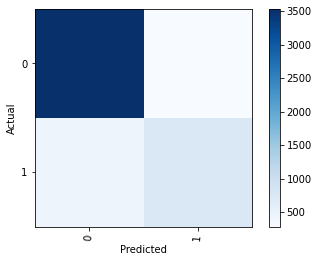

In [59]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


def _evaluate(model, x_test):
  model.eval()

  x = torch.Tensor(x_test).float()
  _, predictions = torch.max(model(x).data, 1)
  print('Evaluation on test dataset')
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  classes=['0','1']
  cm = confusion_matrix(y_test, predictions.numpy())
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=85)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

_evaluate(model, x_test)

# Using binary cross entropy loss

##Train model

In [60]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
# Reshape y target into [-1, 1] to fit with Binary Cross Entropy
train_y = torch.Tensor(y_train).view(-1, 1).float()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=16,
    shuffle=True, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).view(-1, 1).float()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=16,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


In [61]:
test_y

tensor([[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [1.]])

In [63]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, 6)
        self.fc4 = nn.Linear(6, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

# Create a model instance from the network
model = Model()
print(model)

Model(
  (fc1): Linear(in_features=108, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=6, bias=True)
  (fc4): Linear(in_features=6, out_features=1, bias=True)
)


In [64]:
loss_criteria = nn.BCELoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 30 epochs
epochs = 30

In [69]:
def test(model, data_loader):
    '''
    evaluate model accuracy and loss on test
    Args: 
      model: model trained
      data_loader: load the dataset
    '''
    # Turn on evaluation mode
    model.eval()
    test_loss = 0
    correct = 0
    # Constrain operation inside torch.no_grad() to restrict the gradient compute and update weight 
    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()
            # Calculate the accuracy
            predicted = torch.tensor(out.data>=0.5).float()
            correct += torch.sum(target==predicted).item()
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print(correct,' : ', len(data_loader.dataset))
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

In [70]:
# training through epoch
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 0.319945


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


4251  :  5000
Validation set: Average loss: 0.309765, Accuracy: 4251/5000 (85%)

Epoch: 2
Training set: Average loss: 0.313838
4263  :  5000
Validation set: Average loss: 0.308560, Accuracy: 4263/5000 (85%)

Epoch: 3
Training set: Average loss: 0.310075
4257  :  5000
Validation set: Average loss: 0.308104, Accuracy: 4257/5000 (85%)

Epoch: 4
Training set: Average loss: 0.306968
4275  :  5000
Validation set: Average loss: 0.310258, Accuracy: 4275/5000 (86%)

Epoch: 5
Training set: Average loss: 0.304305
4276  :  5000
Validation set: Average loss: 0.309655, Accuracy: 4276/5000 (86%)

Epoch: 6
Training set: Average loss: 0.302517
4273  :  5000
Validation set: Average loss: 0.309900, Accuracy: 4273/5000 (85%)

Epoch: 7
Training set: Average loss: 0.300605
4268  :  5000
Validation set: Average loss: 0.310672, Accuracy: 4268/5000 (85%)

Epoch: 8
Training set: Average loss: 0.299421
4272  :  5000
Validation set: Average loss: 0.309160, Accuracy: 4272/5000 (85%)

Epoch: 9
Training set: Average

## Evaluate

Evaluation on test dataset
ACCURACY_SCORE:  0.8486
F1_SCORE:  0.7846
CONFUSION_MATRIX:
 [[3484  327]
 [ 430  759]] 

              precision    recall  f1-score   support

           0     0.8901    0.9142    0.9020      3811
           1     0.6989    0.6384    0.6673      1189

    accuracy                         0.8486      5000
   macro avg     0.7945    0.7763    0.7846      5000
weighted avg     0.8447    0.8486    0.8462      5000
 



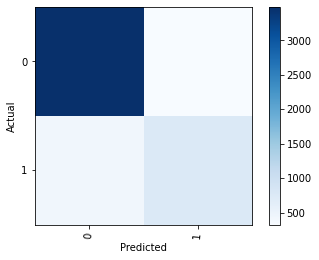

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def _evaluate(model, x_test):
  model.eval()
  x = torch.Tensor(x_test).float()
  predictions = [1 if i>0.5 else 0 for i in model(x).data]
  predictions = torch.tensor(predictions)
  print('Evaluation on test dataset')
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  classes=['0','1']
  cm = confusion_matrix(y_test, predictions.numpy())
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=85)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()
_evaluate(model, x_test)

# Hyperparameter tuning

Các bạn có thể tham khảo link sau để thực hiện hyperparameter tuning trên mạng deep neural network.

https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html